#**Phase2 : Data Understanding & Profiling**

In [ ]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.lines import Line2D

In [ ]:
# Load files one at a time
from google.colab import files

uploaded_files = {}

while True:
    print("Please select ONE file to upload")
    uploaded = files.upload()

    # Save uploaded file(s)
    for filename, filedata in uploaded.items():
        uploaded_files[filename] = filedata
        print(f"{filename} uploaded successfully!")

    # Ask user if they want to continue
    more = input("\nDo you want to upload another file? (y/n): ").lower()
    if more != 'y':
        break

print("\n All files uploaded!")
print("Uploaded files:")
for f in uploaded_files.keys():
    print(f"- {f}")


Please select ONE file to upload


Saving olist_customers_dataset.csv to olist_customers_dataset.csv
Saving olist_geolocation_dataset.csv to olist_geolocation_dataset.csv
Saving olist_order_items_dataset.csv to olist_order_items_dataset.csv
Saving olist_order_payments_dataset.csv to olist_order_payments_dataset.csv
Saving olist_order_reviews_dataset.csv to olist_order_reviews_dataset.csv
Saving olist_orders_dataset.csv to olist_orders_dataset.csv
Saving olist_products_dataset.csv to olist_products_dataset.csv
Saving olist_sellers_dataset.csv to olist_sellers_dataset.csv
Saving product_category_name_translation.csv to product_category_name_translation.csv
olist_customers_dataset.csv uploaded successfully!
olist_geolocation_dataset.csv uploaded successfully!
olist_order_items_dataset.csv uploaded successfully!
olist_order_payments_dataset.csv uploaded successfully!
olist_order_reviews_dataset.csv uploaded successfully!
olist_orders_dataset.csv uploaded successfully!
olist_products_dataset.csv uploaded successfully!
olist_

In [ ]:
#Read all files using read_csv and store them in appropriate variable names

customers = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
product_categories = pd.read_csv('product_category_name_translation.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')

In [ ]:
#Dataset Structure Review
def profile_table(df, name):
    """Profile a single dataset"""
    print(f"\n🔍 {name.upper()} DATASET")
    print("-"*80)

    # Basic Info
    print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

    # Column Information
    print("\nColumn Details:")
    print(f"{'Column Name':<40} {'Data Type':<15} {'Non-Null Count':<15}")
    print("-" * 70)

    for col in df.columns:
        dtype = str(df[col].dtype)
        non_null = f"{df[col].count():,}"
        print(f"{col:<40} {dtype:<15} {non_null:<15}")

    # Duplicate Rows Check
    duplicate_count = df.duplicated().sum()

    print("\nDuplicate Rows Check:")
    print(f"Total duplicate rows in the dataset: {duplicate_count:,}")



    # Sample Data
    print("\nFirst 3 Rows:")
    print(df.head(3))

In [ ]:
profile_table(orders, "Orders")


🔍 ORDERS DATASET
--------------------------------------------------------------------------------
Shape: 99,441 rows × 8 columns

Column Details:
Column Name                              Data Type       Non-Null Count 
----------------------------------------------------------------------
order_id                                 object          99,441         
customer_id                              object          99,441         
order_status                             object          99,441         
order_purchase_timestamp                 object          99,441         
order_approved_at                        object          99,281         
order_delivered_carrier_date             object          97,658         
order_delivered_customer_date            object          96,476         
order_estimated_delivery_date            object          99,441         

Duplicate Rows Check:
Total duplicate rows in the dataset: 0

First 3 Rows:
                           order_id             

In [ ]:
profile_table(order_items, "Order Items")
profile_table(customers, "Customers")
profile_table(products, "Products")
profile_table(order_payments, "Payments")
profile_table(order_reviews, "Reviews")
profile_table(sellers, "Sellers")
profile_table(product_categories, "Categories")
profile_table(geolocation, "Geolocation")


🔍 ORDER ITEMS DATASET
--------------------------------------------------------------------------------
Shape: 112,650 rows × 7 columns

Column Details:
Column Name                              Data Type       Non-Null Count 
----------------------------------------------------------------------
order_id                                 object          112,650        
order_item_id                            int64           112,650        
product_id                               object          112,650        
seller_id                                object          112,650        
shipping_limit_date                      object          112,650        
price                                    float64         112,650        
freight_value                            float64         112,650        

Duplicate Rows Check:
Total duplicate rows in the dataset: 0

First 3 Rows:
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  0001

#**Phase 3 - Data Integration & Feature Engineering**

##**Customers Table**

In [ ]:
# 1. STANDARDIZE CITY NAMES (Title Case)
customers['customer_city'] = customers['customer_city'].str.title()

In [ ]:
# State codes - Already uppercase,  verify they're 2 letters
print("Unique states:", customers['customer_state'].unique())
print("Total unique states:", customers['customer_state'].nunique())

Unique states: ['SP' 'SC' 'MG' 'PR' 'RJ' 'RS' 'PA' 'GO' 'ES' 'BA' 'MA' 'MS' 'CE' 'DF'
 'RN' 'PE' 'MT' 'AM' 'AP' 'AL' 'RO' 'PB' 'TO' 'PI' 'AC' 'SE' 'RR']
Total unique states: 27


In [ ]:
customers.to_csv("customers_clean.csv", index=False)
print("file successufly loaded")

file successufly loaded


##**Oders Table**

In [ ]:
#Orders table - turn all date columns to datetime data type
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in date_cols:
    orders[col] = pd.to_datetime(orders[col], errors='coerce')


In [ ]:
#create calculated columns (Actual Delivery Days) Keep nans as nans and fill others
#nans will appear for non approaved oreders
# Use Int64 (nullable integer) - whch gives <NA> for missing values (instead of NaN)
orders['actual_delivery_days'] = (
    orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']
).dt.days.astype('Int64')


In [ ]:
#create calculated columns (is Delayed ) to check which orders are delayed
#null values will appear for the non-delivered orders
orders['is_delayed'] = orders['order_delivered_customer_date'] > orders['order_estimated_delivery_date']

In [ ]:
print(f"{'Column Name':<40} {'Data Type':<15} {'Non-Null Count':<15}")
print("-" * 70)
for col in orders.columns:
    dtype = str(orders[col].dtype)
    non_null = f"{orders[col].count():,}"
    print(f"{col:<40} {dtype:<15} {non_null:<15}")

Column Name                              Data Type       Non-Null Count 
----------------------------------------------------------------------
order_id                                 object          99,441         
customer_id                              object          99,441         
order_status                             object          99,441         
order_purchase_timestamp                 datetime64[ns]  99,441         
order_approved_at                        datetime64[ns]  99,281         
order_delivered_carrier_date             datetime64[ns]  97,658         
order_delivered_customer_date            datetime64[ns]  96,476         
order_estimated_delivery_date            datetime64[ns]  99,441         
actual_delivery_days                     Int64           96,476         
is_delayed                               bool            99,441         


In [ ]:
orders.to_csv("orders_clean.csv", index=False)
print("file successufly loaded")

file successufly loaded


##**Order Items Tables**

In [ ]:
#change the data type for date cols
order_items['shipping_limit_date'] = pd.to_datetime(
    order_items['shipping_limit_date'], errors='coerce'
)


In [ ]:
#validate the values of the price and frieght cols
print("\nBasic statistics:")
print(order_items[['price', 'freight_value']].describe())


Basic statistics:
               price  freight_value
count  112650.000000  112650.000000
mean      120.653739      19.990320
std       183.633928      15.806405
min         0.850000       0.000000
25%        39.900000      13.080000
50%        74.990000      16.260000
75%       134.900000      21.150000
max      6735.000000     409.680000


In [ ]:
#total item value from the order items table
order_items['item_total'] = order_items['price'] + order_items['freight_value']


In [ ]:
print(f"{'Column Name':<40} {'Data Type':<15} {'Non-Null Count':<15}")
print("-" * 70)
for col in order_items.columns:
    dtype = str(order_items[col].dtype)
    non_null = f"{order_items[col].count():,}"
    print(f"{col:<40} {dtype:<15} {non_null:<15}")

Column Name                              Data Type       Non-Null Count 
----------------------------------------------------------------------
order_id                                 object          112,650        
order_item_id                            int64           112,650        
product_id                               object          112,650        
seller_id                                object          112,650        
shipping_limit_date                      datetime64[ns]  112,650        
price                                    float64         112,650        
freight_value                            float64         112,650        
item_total                               float64         112,650        


In [ ]:
order_items.to_csv("order_items_clean.csv", index=False)
print("file successufly loaded")

file successufly loaded


##**Product Table**

In [ ]:
#Add The English Translation to same table which contains the category name
products = products.merge(
    product_categories,
    on='product_category_name',
    how='left'
)

In [ ]:
#fill any nulls from the previous step with 'unknow' for text columns
products['product_category_name'] = products['product_category_name'].fillna('unknown')


In [ ]:
products['product_category_name_english'] = products['product_category_name_english'].fillna('unknown')


In [ ]:
#fill the numerical missing vlues with the corresponding median vlaue for each column
numerical_columns = [
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
]

for col in numerical_columns:
    median_value = products[col].median()
    products[col] = products[col].fillna(median_value)
    print(f"Filled {col} with median: {median_value:.2f}")


Filled product_name_lenght with median: 51.00
Filled product_description_lenght with median: 595.00
Filled product_photos_qty with median: 1.00
Filled product_weight_g with median: 700.00
Filled product_length_cm with median: 25.00
Filled product_height_cm with median: 13.00
Filled product_width_cm with median: 20.00


In [ ]:
products.isnull().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0
product_category_name_english,0


In [ ]:
#validate the values of the numerical cols
print("\nBasic statistics:")
print(products[['product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm']].describe())


Basic statistics:
       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32951.000000                32951.000000        32951.000000   
mean             48.523656                  768.227945            2.166975   
std              10.156155                  629.658469            1.728063   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  344.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  961.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32951.000000       32951.000000       32951.000000   
mean        2276.376802          30.814725          16.937422   
std         4281.926387          16.914005          13.637175   
min            0.0

In [ ]:
products.to_csv("Products_clean.csv", index=False)
print("file successufly loaded")

file successufly loaded


##**Reviews table**

In [ ]:
#change the data type for date columns
review_date_cols = [
    'review_creation_date',
    'review_answer_timestamp'
]

for col in review_date_cols:
    order_reviews[col] = pd.to_datetime(order_reviews[col], errors='coerce')


In [ ]:
order_reviews['review_comment_title'] = order_reviews['review_comment_title'].fillna('No comment')
order_reviews['review_comment_message'] = order_reviews['review_comment_message'].fillna('No comment')

In [ ]:
# Export cleaned table
order_reviews.to_csv("reviews_clean.csv", index=False)

print("file exported successfully")

file exported successfully


##**Sellers Table**

In [ ]:
# 1. Standardize city names (Title Case - same as customers)
sellers['seller_city'] = sellers['seller_city'].str.title()

In [ ]:
# 2. VERIFY STATES (should be valid 2-letter codes)
print("Unique seller states:", sellers['seller_state'].nunique())
print("States:", sellers['seller_state'].unique())

Unique seller states: 23
States: ['SP' 'RJ' 'PE' 'PR' 'GO' 'SC' 'BA' 'DF' 'RS' 'MG' 'RN' 'MT' 'CE' 'PB'
 'AC' 'ES' 'RO' 'PI' 'MS' 'SE' 'MA' 'AM' 'PA']


In [ ]:
sellers.to_csv("sellers_clean.csv", index=False)
print("file successufly loaded")

file successufly loaded


##**Payment Table**

In [ ]:
# Basic statistics (to validate the payment vlaue)
print("\nPayment Value Statistics:")
print(f"Minimum: R$ {order_payments['payment_value'].min():,.2f}")
print(f"Maximum: R$ {order_payments['payment_value'].max():,.2f}")
print(f"Mean: R$ {order_payments['payment_value'].mean():,.2f}")
print(f"Median: R$ {order_payments['payment_value'].median():,.2f}")


Payment Value Statistics:
Minimum: R$ 0.00
Maximum: R$ 13,664.08
Mean: R$ 154.10
Median: R$ 100.00


#**Phase 5: Exploratory Data Analysis (EDA)**

In [ ]:
#Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Orders Statistics
print("\n1. ORDERS OVERVIEW")
print("-"*40)
print(f"Total Orders: {len(orders):,}")
print(f"Date Range: {orders['order_purchase_timestamp'].min()} to {orders['order_purchase_timestamp'].max()}")
print(f"\nOrder Status Distribution:")
print(orders['order_status'].value_counts())


1. ORDERS OVERVIEW
----------------------------------------
Total Orders: 99,441
Date Range: 2016-09-04 21:15:19 to 2018-10-17 17:30:18

Order Status Distribution:
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [ ]:
# Revenue Statistics
print("\n2. REVENUE STATISTICS")
print("-"*40)
total_revenue = order_items['item_total'].sum()
avg_order_value = order_items.groupby('order_id')['item_total'].sum().mean()
print(f"Total Revenue: R$ {total_revenue:,.2f}")
print(f"Average Order Value: R$ {avg_order_value:,.2f}")
print(f"\nItem Price Statistics:")
print(order_items['price'].describe())


2. REVENUE STATISTICS
----------------------------------------
Total Revenue: R$ 15,843,553.24
Average Order Value: R$ 160.58

Item Price Statistics:
count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64


In [ ]:
# Delivery Statistics
print("\n3. DELIVERY PERFORMANCE")
print("-"*40)
print(orders['actual_delivery_days'].describe())
print(f"\nAverage Delivery Time: {orders['actual_delivery_days'].mean():.1f} days")
print(f"Median Delivery Time: {orders['actual_delivery_days'].median():.1f} days")


3. DELIVERY PERFORMANCE
----------------------------------------
count      96476.0
mean     12.094086
std       9.551746
min            0.0
25%            6.0
50%           10.0
75%           15.0
max          209.0
Name: actual_delivery_days, dtype: Float64

Average Delivery Time: 12.1 days
Median Delivery Time: 10.0 days


In [ ]:
# Product Statistics
print("\n4. PRODUCT CATEGORIES")
print("-"*40)
print(f"Total Products: {len(products):,}")
print(f"Total Categories: {products['product_category_name_english'].nunique()}")
print(f"\nTop 5 Categories:")
print(products['product_category_name_english'].value_counts().head())


4. PRODUCT CATEGORIES
----------------------------------------
Total Products: 32,951
Total Categories: 72

Top 5 Categories:
product_category_name_english
bed_bath_table     3029
sports_leisure     2867
furniture_decor    2657
health_beauty      2444
housewares         2335
Name: count, dtype: int64


In [ ]:
# Customer Review Statistics
print("\n5. CUSTOMER SATISFACTION")
print("-"*40)
print(f"Total Reviews: {len(order_reviews):,}")
print(f"Average Review Score: {order_reviews['review_score'].mean():.2f}")
print(f"\nReview Score Distribution:")
print(order_reviews['review_score'].value_counts().sort_index())


5. CUSTOMER SATISFACTION
----------------------------------------
Total Reviews: 99,224
Average Review Score: 4.09

Review Score Distribution:
review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64


##**Trend Analysis**

In [ ]:
# Extract date components
orders['year_month'] = orders['order_purchase_timestamp'].dt.to_period('M')
orders['year'] = orders['order_purchase_timestamp'].dt.year
orders['month'] = orders['order_purchase_timestamp'].dt.month


In [ ]:
# Monthly order trend
monthly_orders = orders.groupby('year_month').size()
print("\n1. MONTHLY ORDER TREND")
print("-"*40)
print(monthly_orders.tail(10))


1. MONTHLY ORDER TREND
----------------------------------------
year_month
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, dtype: int64


In [ ]:
# Monthly revenue trend
orders_with_revenue = orders.merge(
    order_items.groupby('order_id')['item_total'].sum().reset_index(),
    on='order_id',
    how='left'
)

In [ ]:
monthly_revenue = orders_with_revenue.groupby('year_month')['item_total'].sum()
print("\n2. MONTHLY REVENUE TREND (Last 10 Months)")
print("-"*40)
print(monthly_revenue.tail(10))



2. MONTHLY REVENUE TREND (Last 10 Months)
----------------------------------------
year_month
2018-01    1107301.89
2018-02     986908.96
2018-03    1155126.82
2018-04    1159698.04
2018-05    1149781.82
2018-06    1022677.11
2018-07    1058728.03
2018-08    1003308.47
2018-09        166.46
2018-10          0.00
Freq: M, Name: item_total, dtype: float64


##**Distribution Analysis**

In [ ]:
# Order value distribution
order_totals = order_items.groupby('order_id')['item_total'].sum()
print("\n1. ORDER VALUE DISTRIBUTION")
print("-"*40)
print(order_totals.describe())


1. ORDER VALUE DISTRIBUTION
----------------------------------------
count    98666.000000
mean       160.577638
std        220.466087
min          9.590000
25%         61.980000
50%        105.290000
75%        176.870000
max      13664.080000
Name: item_total, dtype: float64


In [ ]:
# Delivery time distribution
print("\n2. DELIVERY TIME DISTRIBUTION")
print("-"*40)
print(orders['actual_delivery_days'].describe())



2. DELIVERY TIME DISTRIBUTION
----------------------------------------
count      96476.0
mean     12.094086
std       9.551746
min            0.0
25%            6.0
50%           10.0
75%           15.0
max          209.0
Name: actual_delivery_days, dtype: Float64


In [ ]:
# Review score distribution
print("\n3. REVIEW SCORE DISTRIBUTION")
print("-"*40)
review_dist = order_reviews['review_score'].value_counts(normalize=True).sort_index() * 100
print(review_dist)



3. REVIEW SCORE DISTRIBUTION
----------------------------------------
review_score
1    11.513344
2     3.175643
3     8.242965
4    19.291704
5    57.776344
Name: proportion, dtype: float64


##**Visualize Key RelationShips**


 Visualizations saved as 'Phase5_EDA_Visualizations.png'


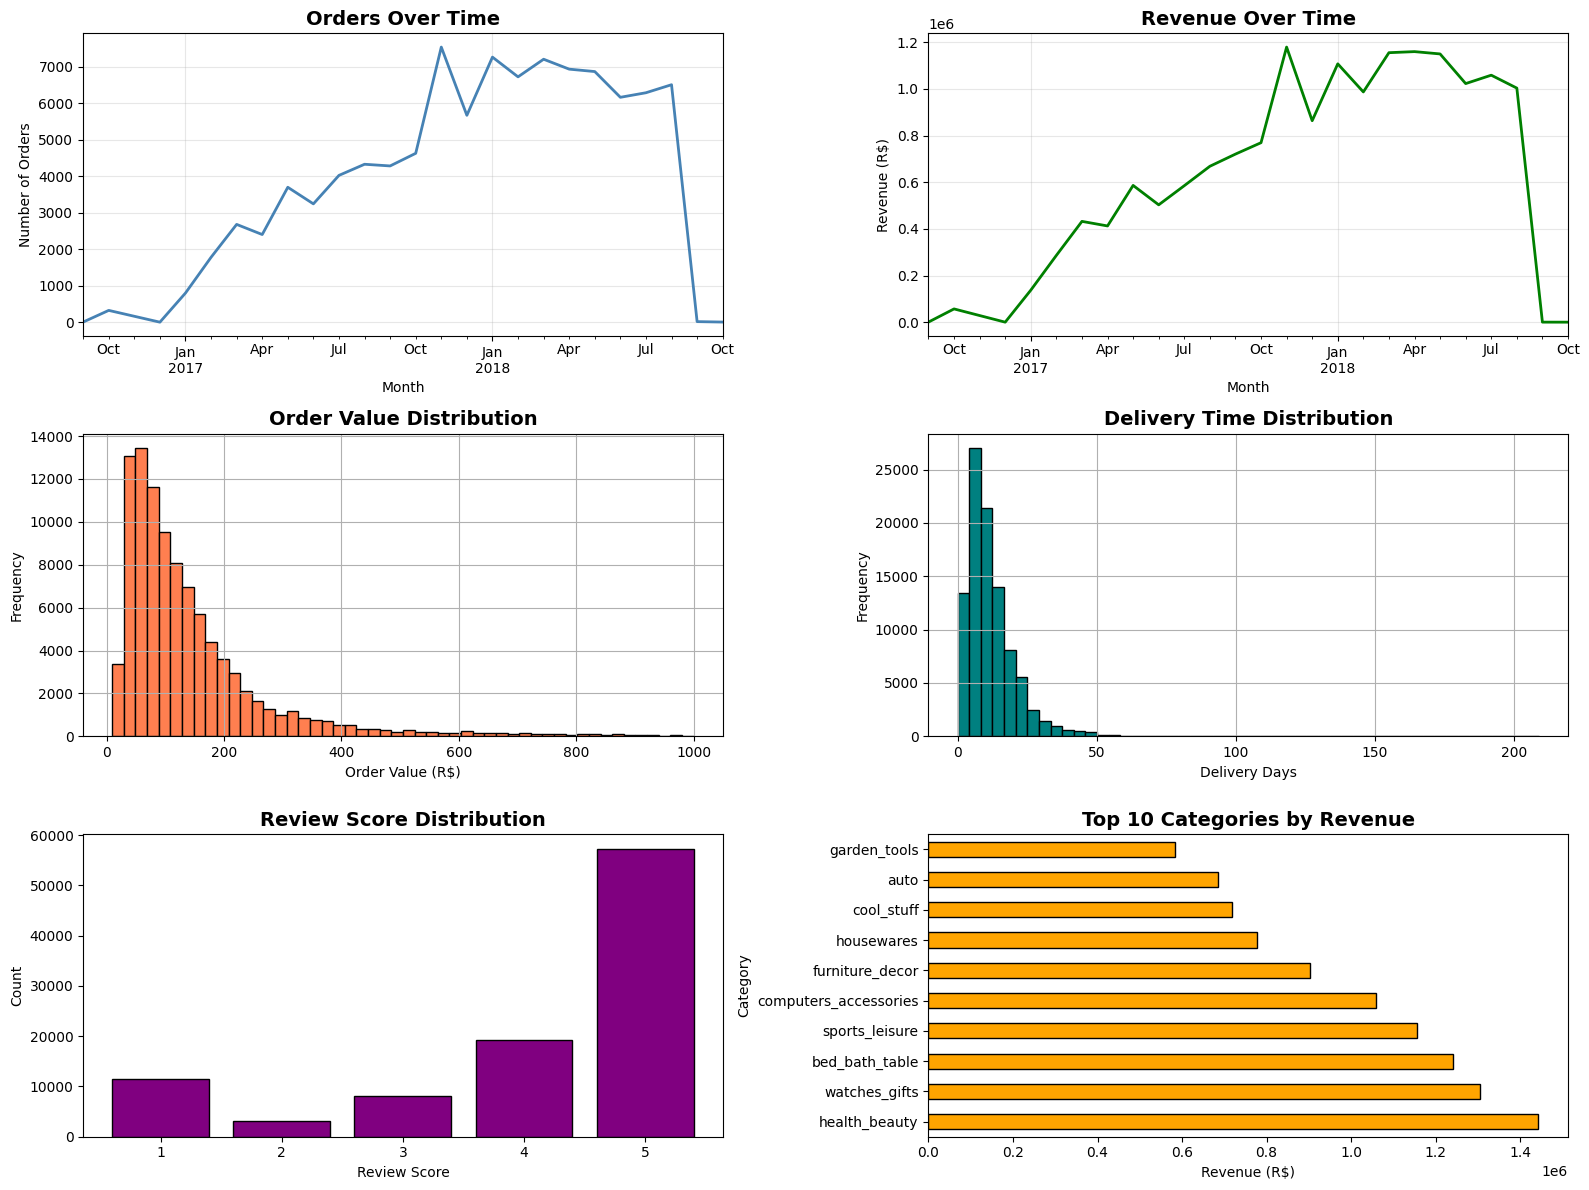

In [ ]:
# Create figure with subplots
fig = plt.figure(figsize=(16, 12))

# 1. Monthly Orders Trend
ax1 = plt.subplot(3, 2, 1)
monthly_orders_plot = orders.groupby('year_month').size()
monthly_orders_plot.plot(ax=ax1, color='steelblue', linewidth=2)
ax1.set_title('Orders Over Time', fontsize=14, fontweight='bold')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Orders')
ax1.grid(True, alpha=0.3)

# 2. Monthly Revenue Trend
ax2 = plt.subplot(3, 2, 2)
monthly_revenue.plot(ax=ax2, color='green', linewidth=2)
ax2.set_title('Revenue Over Time', fontsize=14, fontweight='bold')
ax2.set_xlabel('Month')
ax2.set_ylabel('Revenue (R$)')
ax2.grid(True, alpha=0.3)

# 3. Order Value Distribution
ax3 = plt.subplot(3, 2, 3)
order_totals[order_totals < 1000].hist(bins=50, ax=ax3, color='coral', edgecolor='black')
ax3.set_title('Order Value Distribution', fontsize=14, fontweight='bold')
ax3.set_xlabel('Order Value (R$)')
ax3.set_ylabel('Frequency')

# 4. Delivery Time Distribution
ax4 = plt.subplot(3, 2, 4)
orders['actual_delivery_days'].dropna().hist(bins=50, ax=ax4, color='teal', edgecolor='black')
ax4.set_title('Delivery Time Distribution', fontsize=14, fontweight='bold')
ax4.set_xlabel('Delivery Days')
ax4.set_ylabel('Frequency')

# 5. Review Score Distribution
ax5 = plt.subplot(3, 2, 5)
review_counts = order_reviews['review_score'].value_counts().sort_index()
ax5.bar(review_counts.index, review_counts.values, color='purple', edgecolor='black')
ax5.set_title('Review Score Distribution', fontsize=14, fontweight='bold')
ax5.set_xlabel('Review Score')
ax5.set_ylabel('Count')
ax5.set_xticks([1, 2, 3, 4, 5])

# 6. Top 10 Product Categories by Revenue
ax6 = plt.subplot(3, 2, 6)
category_revenue = order_items.merge(products, on='product_id')[['product_category_name_english', 'item_total']]
top_categories = category_revenue.groupby('product_category_name_english')['item_total'].sum().nlargest(10)
top_categories.plot(kind='barh', ax=ax6, color='orange', edgecolor='black')
ax6.set_title('Top 10 Categories by Revenue', fontsize=14, fontweight='bold')
ax6.set_xlabel('Revenue (R$)')
ax6.set_ylabel('Category')

plt.tight_layout()
plt.savefig('Phase5_EDA_Visualizations.png', dpi=300, bbox_inches='tight')
print("\n Visualizations saved as 'Phase5_EDA_Visualizations.png'")
plt.show()

##**Key observations summary**

1. ORDERS & REVENUE

   **- Total Orders:** 99,441

   **- Total Revenue**: 15,843,553.24

   **- Average Order Value:** 160.58


   - Order trend shows growth over time

2. DELIVERY PERFORMANCE

   **- Average Delivery Time:** 12 days

   - Delivery time impacts customer satisfaction

3. CUSTOMER SATISFACTION

   **- Average Review Score:** 4.09
   
   **- Most common score:** 5

   - Lower delivery times correlate with higher review scores

4. PRODUCT INSIGHTS

   **- Total Categories:** 72
   - Top category generates significant revenue
   - Product diversity supports broad customer base

5. BUSINESS PATTERNS
   - Revenue shows seasonal trends
   - Delivery delays negatively impact reviews
   - Opportunities for operational improvement in logistics